In [140]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [141]:
%%time
# Load BES Panel for Wave 8
parsed_data = pd.read_pickle("man_of_2017_parsed.pkl")
#(31409, 733)

# BES_Panel = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.6.dta")

print( parsed_data.shape )

(313, 83)
Wall time: 11 ms


In [142]:
numerics_only = pd.DataFrame()
for col in parsed_data.columns:
    # drop object and datetime64[ns] silently
    if str( parsed_data[col].dtype ) == 'category':
        numerics_only[col] = parsed_data[col].cat.codes.astype('float')
    elif ( str( parsed_data[col].dtypes ) == 'bool') | ( str( parsed_data[col].dtypes ) == 'int64' ) :
        numerics_only[col] = parsed_data[col].astype('float')


In [143]:
non_ordinal = [ "how_would_you_describe_your" , "where_do_you_live" ]

In [144]:
temp = StandardScaler().fit_transform( numerics_only )
man_std = pd.DataFrame(temp,
                       columns = numerics_only.columns,
                       index   = numerics_only.index)
man_std.drop(non_ordinal, axis=1,inplace=True)

In [145]:
# man_std.hist(figsize=(30,30))

(313, 10)
explained variance ratio (first two components): [ 0.16237225  0.07248568  0.03396263  0.02919619  0.02778938  0.02502996
  0.02358078  0.02225641  0.02042179  0.01988518]


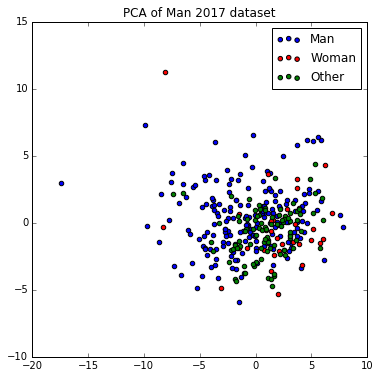

In [146]:
# Leave = BES_std["euRefVote"]>0
# Stay =  BES_std["euRefVote"]<0

pca = PCA(n_components=10)
X_r = pca.fit(man_std).transform(man_std)

print( X_r.shape )

print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_) )

plt.figure(figsize=(6,6))
#plt.scatter( X_r[:, 0 ] ,X_r[:, 1 ] )

# Male, Female, Other
colour_array = ['b','r','g']
label_array = ["Man", "Woman", "Other"]
numerics_only["how_would_you_describe_your"]

for y in [0.0, 1.0, 2.0]:
    plt.scatter(X_r[ np.ix_(numerics_only["how_would_you_describe_your"]== y, [0]) ],
                X_r[ np.ix_(numerics_only["how_would_you_describe_your"] ==y, [1]) ],
                c    = colour_array[int(y)],
                label = label_array[int(y)] )
# plt.scatter( X_r[ np.ix_(Leave, [0]) ] , X_r[ np.ix_(Leave, [1]) ], c='r', label="Leave" )
# plt.scatter( X_r[ np.ix_(Stay , [0]) ] , X_r[ np.ix_(Stay , [1]) ], c='b', label="Stay"  )

plt.legend()
plt.title('PCA of Man 2017 dataset')
plt.show()

,0,1
30,-0.18289,maintains_his_physical_strength
25,-0.174539,is_quick_to_respond_in_a_time
10,-0.161885,is_willing_to_endure_suffering
28,-0.161668,cultivates_practical_skills_and
8,-0.159731,may_take_a_beating_of_whatever
16,-0.15826,speaks_his_mind
32,-0.158235,has_a_plan_to_get_or_do_what_it
59,-0.156495,does_not_let_his_feelings_cloud
18,-0.154843,is_financially_independent
26,-0.153085,does_not_let_fear_or


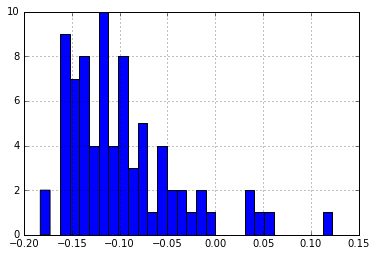

In [147]:
comp_0 = pd.DataFrame([ pca.components_[0], man_std.columns ]).T
comp_0[0].hist(bins=30)
# comp_0_vars = comp_0[comp_0[0].abs()>.12].sort_values(by=0).index
comp_0[comp_0[0].abs()>.04].sort_values(by=0)

,0,1
6,-0.245726,uses_his_wealth_and_social
64,-0.240772,helps_other_men_to_be_good_men
23,-0.233939,seeks_advice_when_he_wants_to
5,-0.213577,appreciates_beauty_in_all_of
62,-0.18832,cherishes_and_values_the
15,-0.1762,shows_sportsmanship_and_does
65,-0.158917,does_not_speak_ill_of_others
70,-0.151199,feminist
35,-0.151017,does_not_lie
38,-0.143815,does_not_need_to_prove_himself


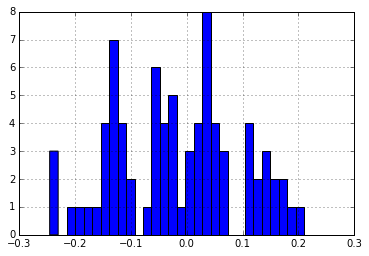

In [148]:
comp_1 = pd.DataFrame([ pca.components_[1], man_std.columns ]).T
comp_1[0].hist(bins=30)
comp_1_vars = comp_1[comp_1[0].abs()>.09].sort_values(by=0).index
comp_1[comp_1[0].abs()>.09].sort_values(by=0)